In [38]:
from ycimpute.imputer.knnimput import KNN # inputation library
import missingno as msno # visualzing missing value
import pandas as pd
import numpy as np
import time

# input of imputation method

In [43]:
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute,axis = 1, inplace = True)
print (df.shape)

(356251, 218)


In [44]:
df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,...,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_NAME_CONTRACT_STATUS_Active_MIN
0,24700.5,406597.5,351000.0,0.0,0.0250,0,-9461,-637.0,-2120,-1134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35698.5,1293502.5,1129500.0,0.0,0.0968,1,-16765,-1188.0,-291,-828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6750.0,135000.0,135000.0,0.0,NaN,0,-19046,-225.0,-2531,-815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,NaN,NaN,1,-19005,-3039.0,-2437,-617.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0
4,21865.5,513000.0,513000.0,0.0,NaN,0,-19932,-3038.0,-3458,-1106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# demo KNN imputation algor

num_traning_point 5
Imputing row 1/5 with 30 missing, elapsed time: 0.000
[KNN] Warning: 5/1090 still missing after imputation, replacing with 0
0.6331493854522705


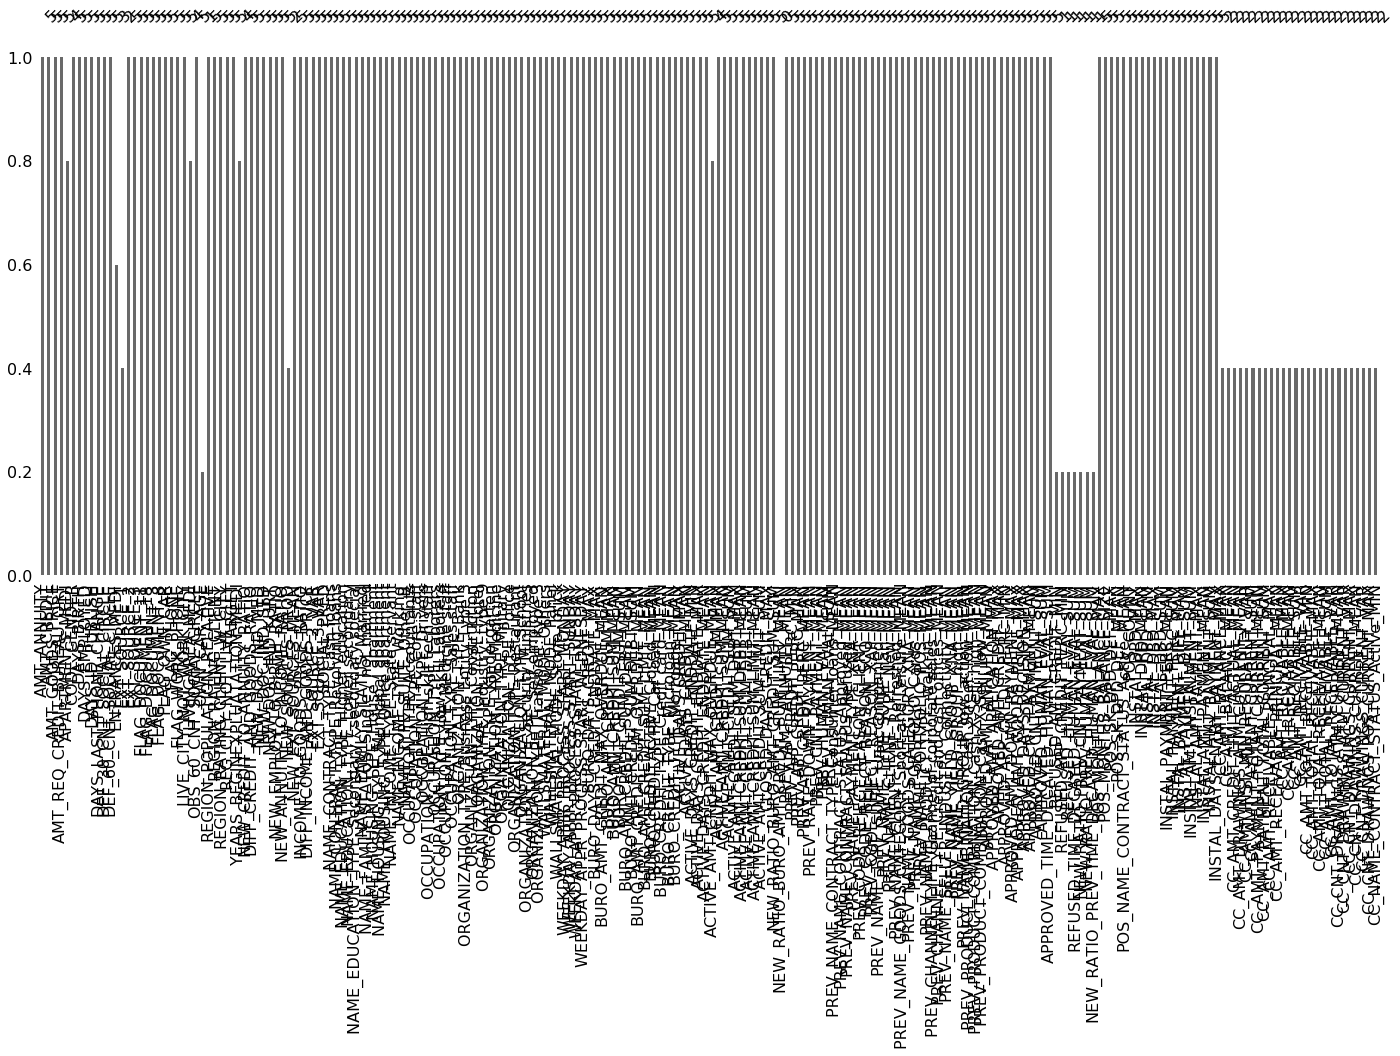

In [45]:
s = time.time()
# setting
num_traning_point = int(5) # for memory problem, we cannot feed all the data points into algorithm, which depends on row and n_features
print ('num_traning_point', num_traning_point)
# no distance can tune
# preprocessing for algorithm
drop_targtet = False
if drop_targtet == True:
    # avoidnig 
    df.drop(['TARGET'], axis =1, inplace = True)
    X_missing = df.sample(n = num_traning_point).copy()
else:
    X_missing = df.sample(n = num_traning_point).copy()
# 
msno.bar(X_missing)
# core algorithm: input should be array
# k: Use the k-th nearesit training point to impute the missing value: the less k, the more we cannot impute.
# For example, in the extreme case, K == X_missing.shape[0], theoretically every missing value will 
# be replaced with non-nan number, except all value of this filed is nan.
# using what to impute?
X_filled = KNN(k = 5).complete(X_missing.values) 
e = time.time()
print (e-s) # 790 secs =~ 10 mins

In [46]:
X_missing

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,...,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_NAME_CONTRACT_STATUS_Active_MIN
196076,43191.0,545040.0,450000.0,0.0,0.0541,0,-10807,-839.0,-3385,-1061.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285645,12960.0,343800.0,225000.0,0.0,0.0083,1,-17792,-5751.0,-1192,0.0,...,83740.707102,7369182.225,5.841351e+09,0.215909,1.458595,10.0,0.227273,1.487983,1.0,1.0
136350,46570.5,1483231.5,1354500.0,0.0,0.0937,1,-13203,-1775.0,-4256,-1104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105059,18936.0,288873.0,238500.0,0.0,NaN,1,-11169,-841.0,-944,-706.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208831,20461.5,271957.5,252000.0,0.0,0.0312,1,-16731,-1367.0,-289,0.0,...,1911.678072,158669.280,6.057983e+07,0.000000,0.000000,1.0,0.012048,0.012048,0.0,1.0


In [47]:
X_missing[['TARGET']]

,TARGET
196076,0.0
285645,0.0
136350,0.0
105059,0.0
208831,0.0


In [48]:
X_filled = pd.DataFrame(X_filled, columns = X_missing.columns)
X_filled

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,...,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_NAME_CONTRACT_STATUS_Active_MIN
0,43191.0,545040.0,450000.0,0.0,0.054100,0.0,-10807.0,-839.0,-3385.0,-1061.0,...,3603.667773,3.077620e+05,1.801096e+08,0.004464,0.030160,1.186094,0.016498,0.042566,0.020677,1.0
1,12960.0,343800.0,225000.0,0.0,0.008300,1.0,-17792.0,-5751.0,-1192.0,0.0,...,83740.707102,7.369182e+06,5.841351e+09,0.215909,1.458595,10.000000,0.227273,1.487983,1.000000,1.0
2,46570.5,1483231.5,1354500.0,0.0,0.093700,1.0,-13203.0,-1775.0,-4256.0,-1104.0,...,43729.835812,3.843552e+06,3.014803e+09,0.110339,0.745405,5.599388,0.122037,0.766315,0.511043,1.0
3,18936.0,288873.0,238500.0,0.0,0.039318,1.0,-11169.0,-841.0,-944.0,-706.0,...,2376.179065,1.995996e+05,9.339427e+07,0.001226,0.008280,1.051088,0.013270,0.020426,0.005676,1.0
4,20461.5,271957.5,252000.0,0.0,0.031200,1.0,-16731.0,-1367.0,-289.0,0.0,...,1911.678072,1.586693e+05,6.057983e+07,0.000000,0.000000,1.000000,0.012048,0.012048,0.000000,1.0


In [49]:
X_filled[['TARGET']]

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [57]:
X_filled[X_filled.isnull()]

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,...,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_NAME_CONTRACT_STATUS_Active_MIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


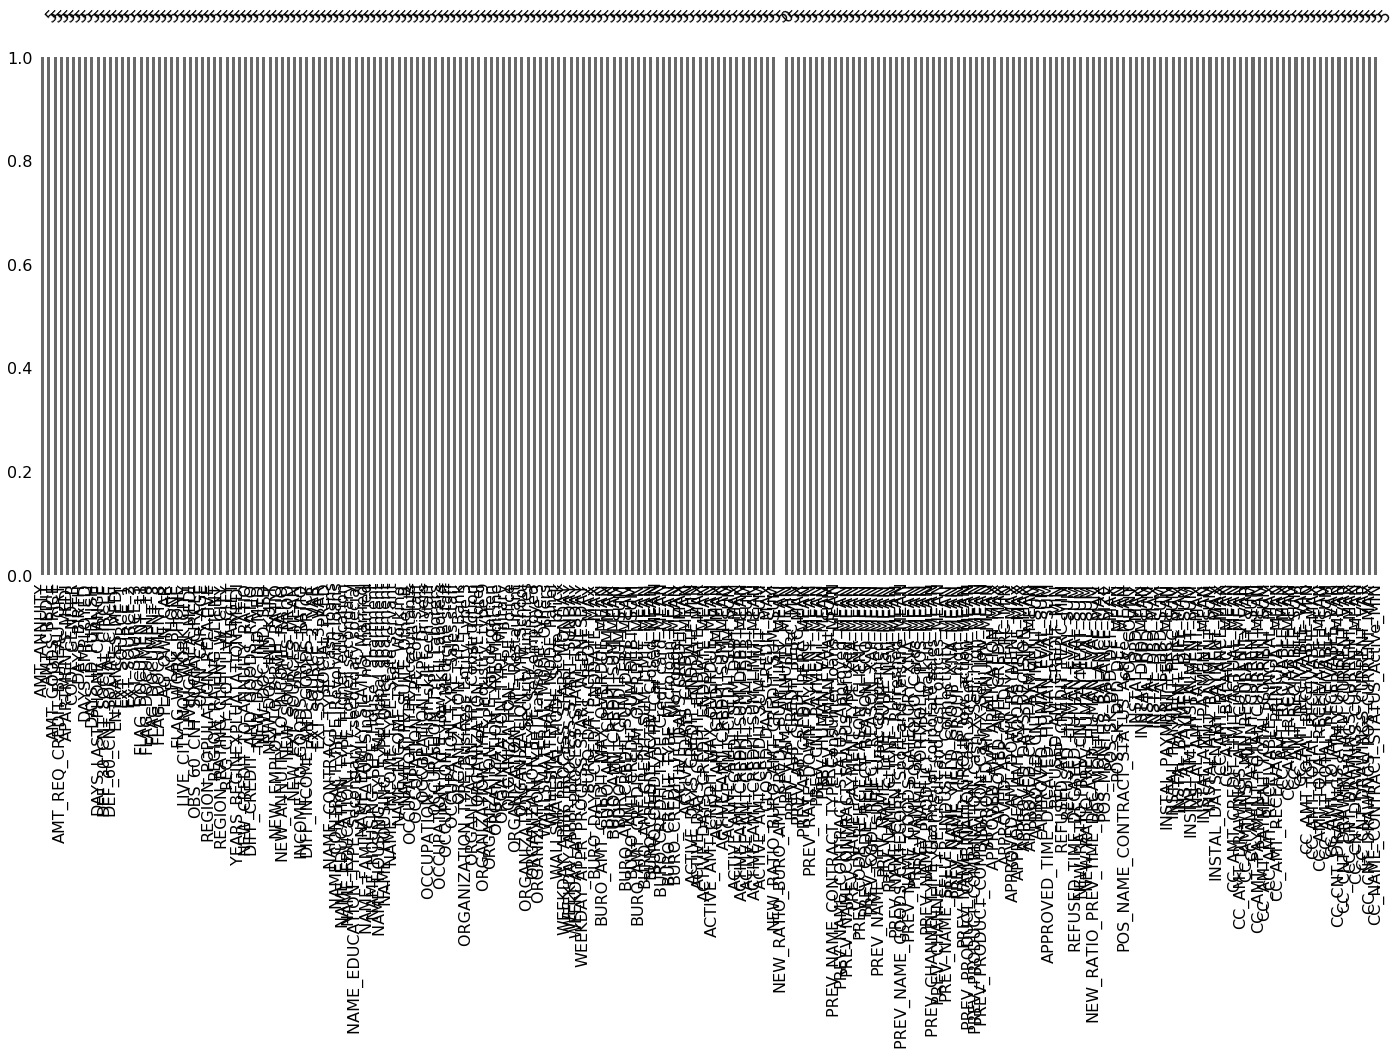

In [54]:
msno.bar(X_filled)

# demo using what to inpute the nan
### do output of this column only depend on the input_column?
### weighted sum of input

In [52]:
0.039318 == (0.054100 + 0.008300 + 0.093700 + 0.031200) / 5.0

False

In [53]:
(0.054100 + 0.008300 + 0.093700 + 0.031200) / 5.0

0.03746000000000001